## Business Understanding

Dataset E-Commerce Public berisi data transaksi pelanggan pada platform e-commerce.
Analisis ini bertujuan untuk memahami tren penjualan serta perilaku pelanggan guna
mendukung pengambilan keputusan bisnis.

## Pertanyaan Bisnis
1. Bagaimana tren penjualan dari waktu ke waktu?
2. Bagaimana segmentasi pelanggan berdasarkan RFM Analysis?

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

## Load Data

Dataset yang digunakan adalah **Brazilian E-Commerce Public Dataset by Olist**
yang diperoleh dari Kaggle. Dataset ini berisi informasi transaksi pelanggan,
detail pesanan, serta produk yang dijual pada platform e-commerce di Brasil.

In [2]:
# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)
os.listdir(path)

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Path to dataset files: /kaggle/input/brazilian-ecommerce


['olist_customers_dataset.csv',
 'olist_sellers_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_products_dataset.csv',
 'olist_geolocation_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_payments_dataset.csv']

In [3]:
customers = pd.read_csv(f"{path}/olist_customers_dataset.csv")
orders = pd.read_csv(f"{path}/olist_orders_dataset.csv")
items = pd.read_csv(f"{path}/olist_order_items_dataset.csv")

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Data Wrangling

In [7]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [8]:
orders = orders[orders['order_status'] == 'delivered']

Analisis difokuskan pada pesanan dengan status *delivered* agar nilai transaksi
dan waktu pembelian valid untuk dianalisis.

In [9]:
items.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


Tabel items tidak memiliki missing value sehingga tidak memerlukan
penanganan khusus.

In [10]:
customers.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


Tabel customer tidak memiliki missing value sehingga tidak memerlukan
penanganan khusus.

In [11]:
df_orders_items = orders.merge(
    items,
    on="order_id",
    how="inner"
)

In [12]:
df_orders_items.shape
df_orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [13]:
df = df_orders_items.merge(
    customers,
    on="customer_id",
    how="inner"
)

In [14]:
df['revenue'] = df['price'] + df['freight_value']

In [15]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110197 entries, 0 to 110196
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   customer_id                    110197 non-null  object 
 2   order_status                   110197 non-null  object 
 3   order_purchase_timestamp       110197 non-null  object 
 4   order_approved_at              110182 non-null  object 
 5   order_delivered_carrier_date   110195 non-null  object 
 6   order_delivered_customer_date  110189 non-null  object 
 7   order_estimated_delivery_date  110197 non-null  object 
 8   order_item_id                  110197 non-null  int64  
 9   product_id                     110197 non-null  object 
 10  seller_id                      110197 non-null  object 
 11  shipping_limit_date            110197 non-null  object 
 12  price                         

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,2
order_delivered_customer_date,8
order_estimated_delivery_date,0
order_item_id,0
product_id,0


Dataset akhir diperoleh melalui proses penggabungan tiga tabel utama, yaitu
`orders`, `order_items`, dan `customers`. Penggabungan dilakukan secara bertahap
untuk memastikan integritas data tetap terjaga.

Tahap pertama, tabel `orders` digabungkan dengan tabel `order_items`
menggunakan kunci `order_id`. Proses ini bertujuan untuk menghubungkan informasi
pesanan dengan detail item yang dibeli, seperti harga produk dan biaya pengiriman.
Penggabungan ini menghasilkan data transaksi yang lengkap pada level pesanan.

Tahap kedua, hasil penggabungan tersebut kemudian digabungkan dengan tabel
`customers` menggunakan kunci `customer_id`. Langkah ini dilakukan untuk
menambahkan informasi pelanggan, seperti lokasi dan identitas pelanggan, ke
dalam data transaksi.

Penggabungan data menggunakan metode *inner join*, sehingga hanya data yang
memiliki kecocokan pada kedua tabel yang disertakan dalam dataset akhir.
Selain itu, analisis difokuskan pada pesanan dengan status *delivered* agar data
yang dianalisis merepresentasikan transaksi yang telah berhasil diselesaikan.

Dataset hasil penggabungan ini selanjutnya digunakan sebagai dasar dalam
analisis tren penjualan dan analisis perilaku pelanggan, termasuk penerapan
RFM Analysis.

##Exploratory Data Analysis (EDA)

In [16]:
df.describe()

,order_item_id,price,freight_value,customer_zip_code_prefix,revenue
count,110197.000000,110197.000000,110197.000000,110197.000000,110197.000000
mean,1.198181,119.980563,19.948598,35155.346888,139.929161
std,0.706676,182.299446,15.698136,29901.148745,189.319151
min,1.000000,0.850000,0.000000,1003.000000,6.080000
25%,1.000000,39.900000,13.080000,11310.000000,55.180000
50%,1.000000,74.900000,16.260000,24344.000000,92.130000
75%,1.000000,134.170000,21.150000,59066.000000,157.510000
max,21.000000,6735.000000,409.680000,99980.000000,6929.310000


Hasil statistik deskriptif menunjukkan variasi nilai transaksi yang cukup besar,
menandakan adanya perbedaan kontribusi pelanggan terhadap pendapatan.

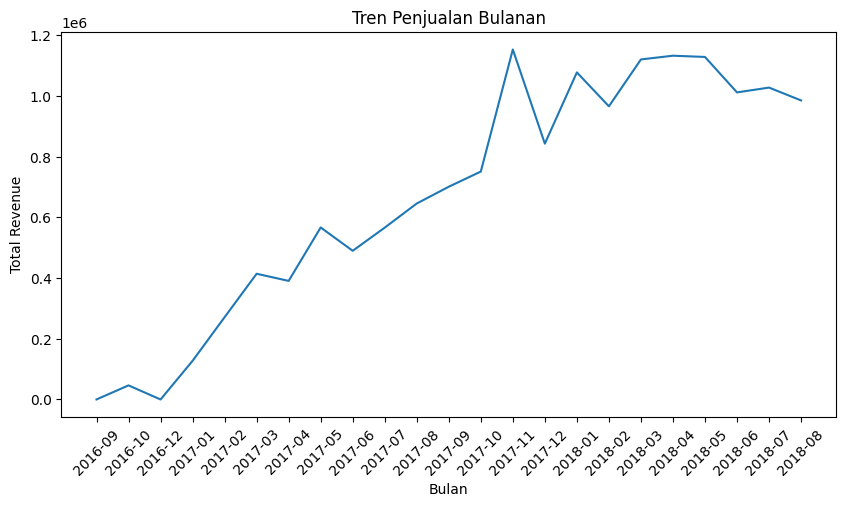

In [17]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
monthly_sales = df.groupby(
    df['order_purchase_timestamp'].dt.to_period('M')
)['revenue'].sum()

monthly_sales.index = monthly_sales.index.astype(str)

plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xticks(rotation=45)
plt.title("Tren Penjualan Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Total Revenue")
plt.show()

Visualisasi menunjukkan bahwa penjualan mengalami fluktuasi dengan kecenderungan
meningkat pada periode tertentu, yang dapat dimanfaatkan untuk strategi promosi.

## Analisis Lanjutan (RFM)

In [18]:
latest_date = df['order_purchase_timestamp'].max()

rfm = df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,
    'order_id': 'count',
    'revenue': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [19]:
rfm['R'] = pd.qcut(
    rfm['Recency'].rank(method='first'),
    4,
    labels=[4, 3, 2, 1]
)

rfm['F'] = pd.qcut(
    rfm['Frequency'].rank(method='first'),
    4,
    labels=[1, 2, 3, 4]
)

rfm['M'] = pd.qcut(
    rfm['Monetary'].rank(method='first'),
    4,
    labels=[1, 2, 3, 4]
)

In [20]:
rfm['RFM_Score'] = rfm['R'].astype(int) + rfm['F'].astype(int) + rfm['M'].astype(int)

In [21]:
def segment(score):
    if score >= 10:
        return "Champion"
    elif score >= 7:
        return "Loyal Customer"
    else:
        return "At Risk"

rfm['Segment'] = rfm['RFM_Score'].apply(segment)

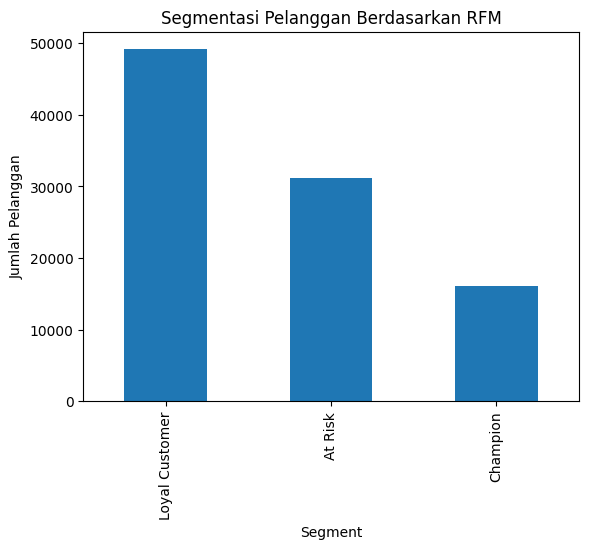

In [22]:
rfm['Segment'].value_counts().plot(kind='bar')
plt.title("Segmentasi Pelanggan Berdasarkan RFM")
plt.xlabel("Segment")
plt.ylabel("Jumlah Pelanggan")
plt.show()

Hasil segmentasi pelanggan menggunakan metode RFM menunjukkan bahwa mayoritas
pelanggan berada pada segmen *Loyal Customer*. Hal ini mengindikasikan bahwa
sebagian besar pelanggan memiliki frekuensi pembelian dan nilai transaksi yang
cukup baik, meskipun tidak selalu melakukan pembelian dalam waktu yang sangat
dekat.

Selain itu, terdapat sejumlah pelanggan yang tergolong dalam segmen *At Risk*.
Segmen ini menunjukkan pelanggan yang memiliki riwayat pembelian di masa lalu,
namun sudah cukup lama tidak melakukan transaksi kembali. Kondisi ini
mengindikasikan adanya potensi kehilangan pelanggan apabila tidak dilakukan
strategi retensi yang tepat.

Sementara itu, segmen *Champion* memiliki jumlah paling sedikit, namun merupakan
pelanggan dengan nilai paling tinggi karena memiliki pembelian yang relatif
baru, frekuensi transaksi tinggi, serta nilai belanja yang besar. Segmen ini
memberikan kontribusi signifikan terhadap pendapatan dan perlu dipertahankan
melalui program loyalitas khusus.

## Persiapan Data Dashboard

In [23]:
df_dashboard = df.merge(
    rfm[['Segment', 'RFM_Score']],
    left_on='customer_id',
    right_index=True,
    how='left'
)

In [25]:
# buat kolom order_month dari timestamp
df_dashboard['order_month'] = (
    df_dashboard['order_purchase_timestamp']
    .dt.to_period('M')
    .astype(str)
)

In [27]:
main_data_small = df_dashboard[
    ['order_month', 'revenue', 'Segment', 'customer_id']
].copy()

main_data_small.to_csv(
    "main_data.csv",
    index=False
)